In [2]:
import json
import itertools
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
washington_file = "./washington_heatmap.json"
montreal_file = "./montreal_heatmap.json"

with open(washington_file) as f:
    washington_data = json.load(f)
with open(montreal_file) as f:
    montreal_data = json.load(f)

In [4]:
def generate_heatmaps(data):
    heatmaps = []
    for station in data['stations']:
        middle = station['pos']
        x_coords = [middle[0] - 2, middle[0] - 1, middle[0], middle[0] + 1, middle[0] + 2]
        y_coords = [middle[1] - 2, middle[1] - 1, middle[1], middle[1] + 1, middle[1] + 2]
        
        data = []
        for i, coords in enumerate(itertools.product(x_coords, y_coords)):
            if i % 5 == 0:
                data.append([])
            if f'({coords[0]}, {coords[1]})' in station['heatmap']:
                data[-1].append(station['heatmap'][f'({coords[0]}, {coords[1]})'])
            else:
                data[-1].append(np.nan)

        print('Neighbors:')
        for neighbor in station['neighbors']:
            print(f'Station ID: {neighbor["station_id"]}, Distance: {neighbor["distance"]:.2f} at Angle {neighbor["angle"]}')

        heatmapDataFrame = DataFrame(data, index=x_coords, columns=y_coords)
        heatmaps.append(heatmapDataFrame)
        ax = sns.heatmap(heatmapDataFrame, annot=True, fmt=".1f")
        plt.title(f'Station ID: {station["station_id"]}, original position: {station["original_pos"]}')
        plt.show()
    return heatmaps

Neighbors:
Station ID: 50, Distance: 92.50 at Angle 47.0


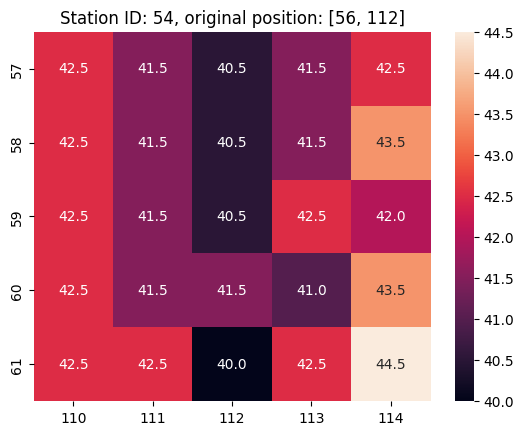

Neighbors:
Station ID: 35, Distance: 89.75 at Angle 39.0


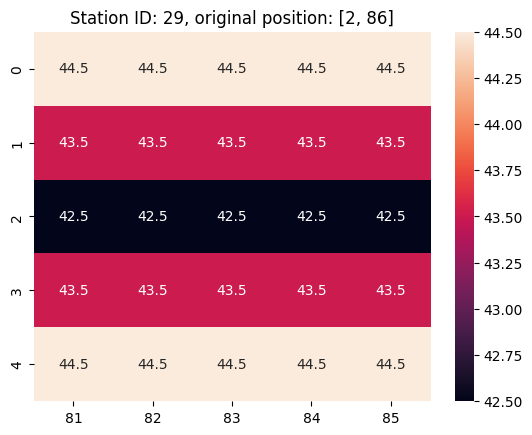

Neighbors:
Station ID: 14, Distance: 13.93 at Angle 130.0
Station ID: 7, Distance: 68.96 at Angle 68.0


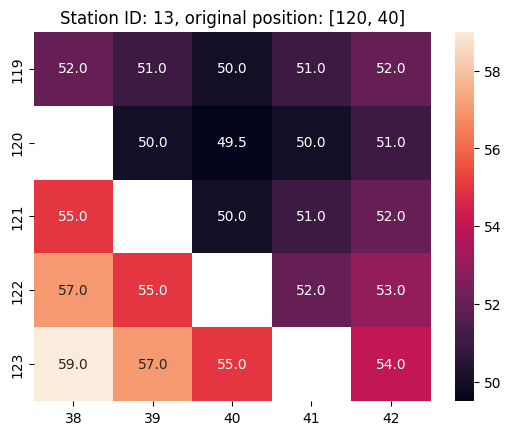

Neighbors:
Station ID: 50, Distance: 54.20 at Angle 66.0


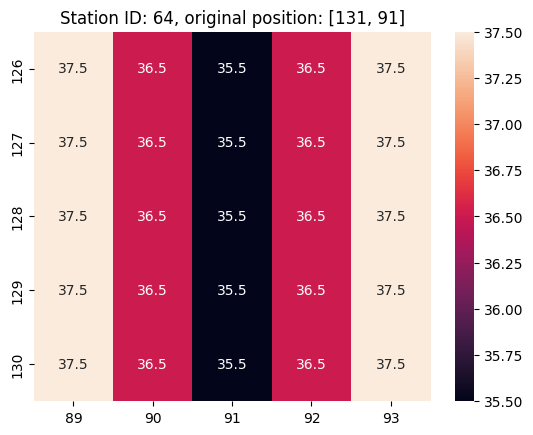

Neighbors:
Station ID: 14, Distance: 81.16 at Angle 44.0
Station ID: 35, Distance: 114.33 at Angle 62.0
Station ID: 64, Distance: 54.20 at Angle 114.0
Station ID: 54, Distance: 92.50 at Angle 227.0


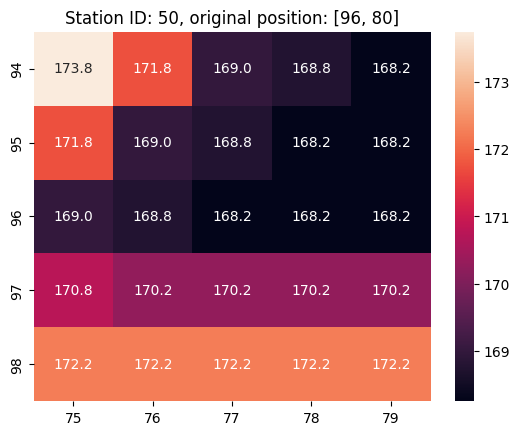

Neighbors:
Station ID: 14, Distance: 82.89 at Angle 115.0
Station ID: 35, Distance: 78.30 at Angle 245.0
Station ID: 13, Distance: 68.96 at Angle 112.0
Station ID: 0, Distance: 89.13 at Angle 72.0


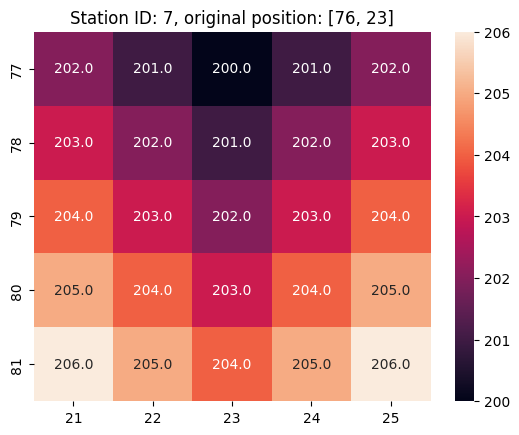

Neighbors:
Station ID: 7, Distance: 78.30 at Angle 65.0
Station ID: 29, Distance: 89.75 at Angle 219.0
Station ID: 50, Distance: 114.33 at Angle 118.0


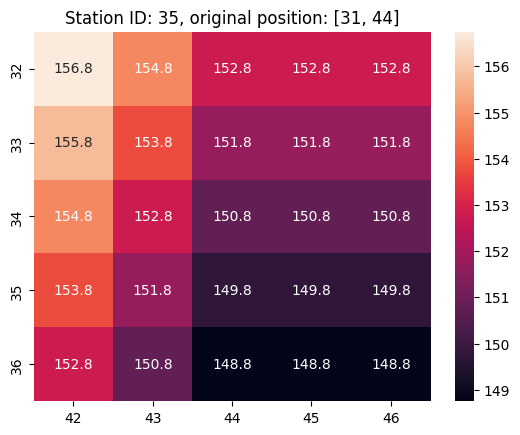

Neighbors:
Station ID: 7, Distance: 89.13 at Angle 108.0


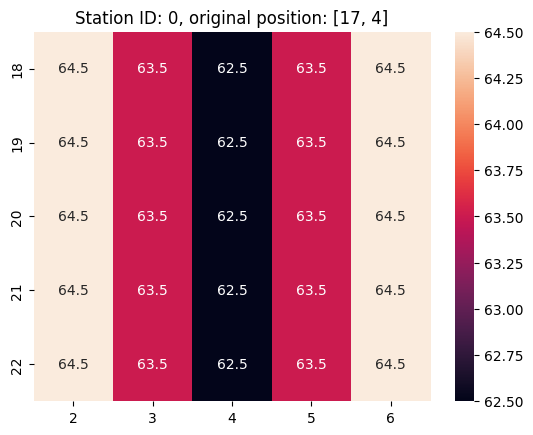

Neighbors:
Station ID: 13, Distance: 13.93 at Angle 50.0
Station ID: 50, Distance: 81.16 at Angle 224.0
Station ID: 7, Distance: 82.89 at Angle 65.0
Station ID: 26, Distance: 183.88 at Angle 116.0
Station ID: 28, Distance: 63.86 at Angle 78.0


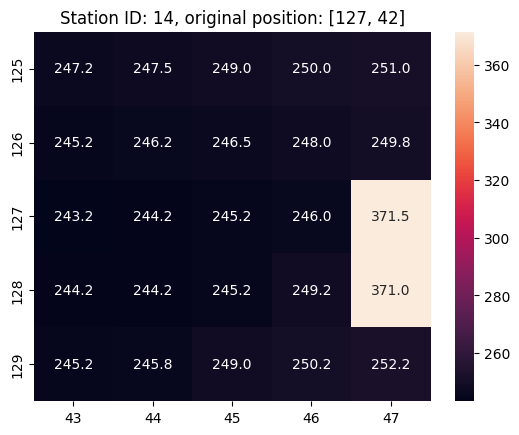

Neighbors:
Station ID: 14, Distance: 63.86 at Angle 258.0


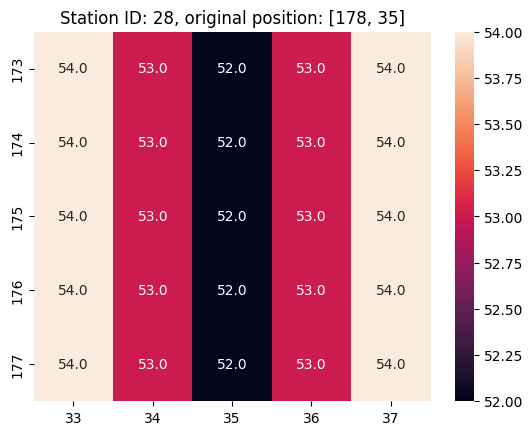

Neighbors:
Station ID: 14, Distance: 183.88 at Angle 64.0


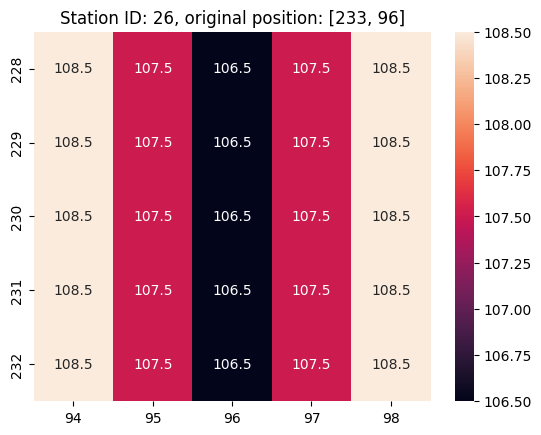

In [5]:
montreal_heatmaps = generate_heatmaps(montreal_data)

Neighbors:
Station ID: 52, Distance: 15.76 at Angle 105.0
Station ID: 81, Distance: 21.17 at Angle 6.0
Station ID: 31, Distance: 28.44 at Angle 225.0


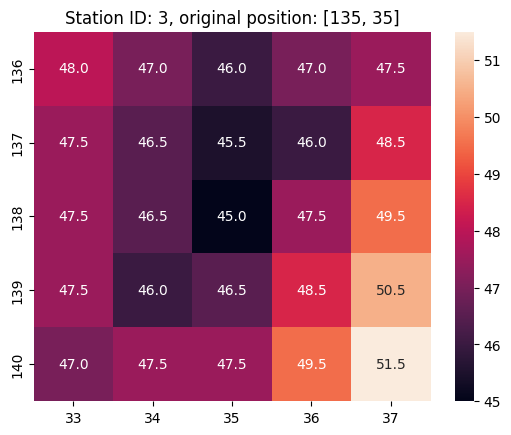

Neighbors:
Station ID: 34, Distance: 5.17 at Angle 45.0
Station ID: 0, Distance: 47.54 at Angle 43.0
Station ID: 45, Distance: 54.79 at Angle 206.0
Station ID: 49, Distance: 47.03 at Angle 113.0


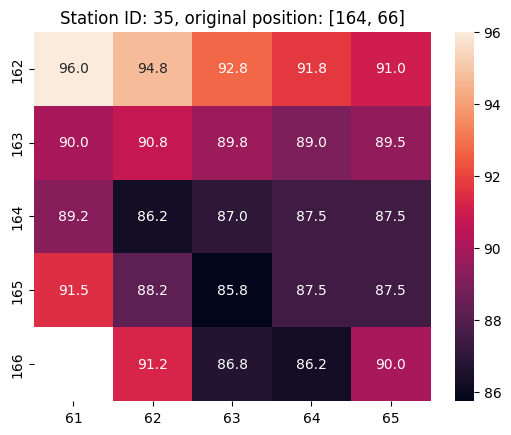

Neighbors:
Station ID: 11, Distance: 24.17 at Angle 85.0
Station ID: 31, Distance: 42.34 at Angle 96.0


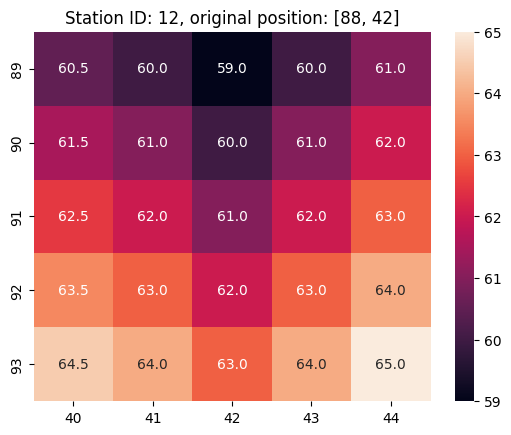

Neighbors:
Station ID: 35, Distance: 47.03 at Angle 67.0


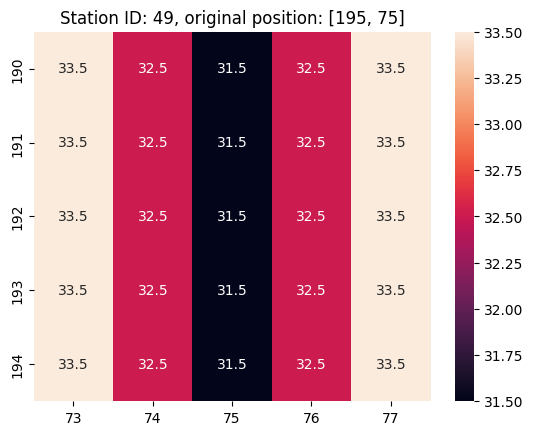

Neighbors:
Station ID: 0, Distance: 3.59 at Angle 117.0
Station ID: 52, Distance: 12.93 at Angle 45.0
Station ID: 5, Distance: 153.39 at Angle 222.0
Station ID: 31, Distance: 21.76 at Angle 260.0


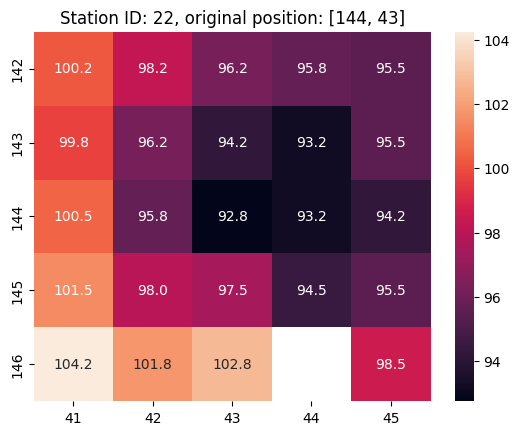

Neighbors:
Station ID: 58, Distance: 61.20 at Angle 70.0


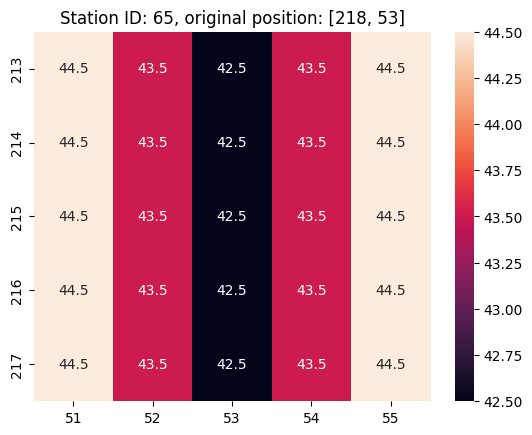

Neighbors:
Station ID: 11, Distance: 162.56 at Angle 41.0


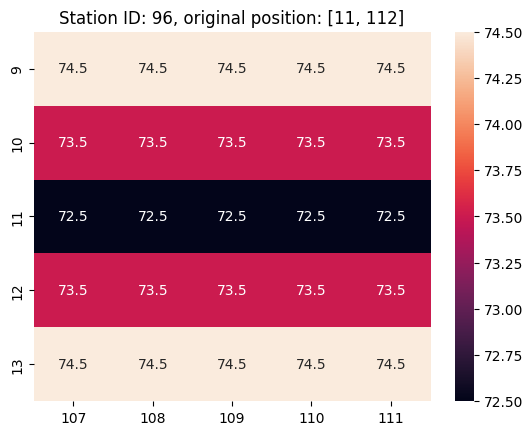

Neighbors:
Station ID: 35, Distance: 5.17 at Angle 225.0
Station ID: 0, Distance: 46.96 at Angle 50.0


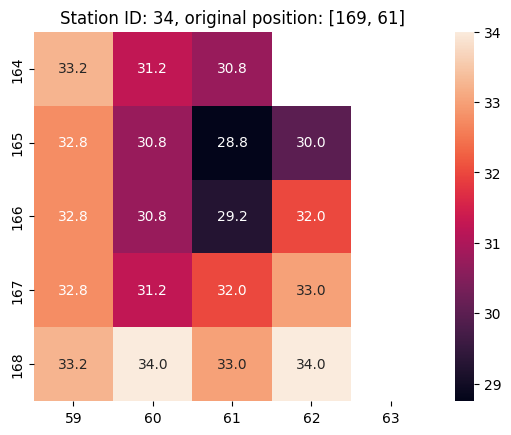

Neighbors:
Station ID: 81, Distance: 23.51 at Angle 113.0


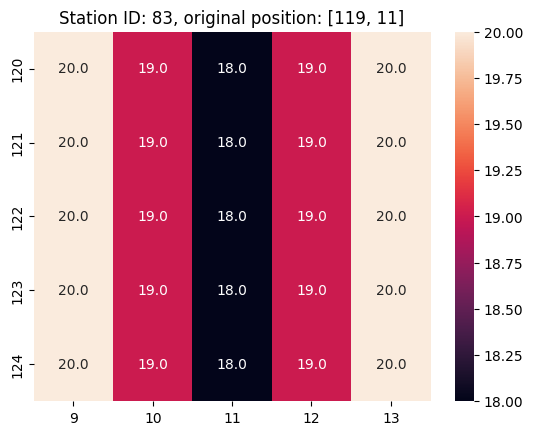

Neighbors:
Station ID: 52, Distance: 1.00 at Angle 0.0
Station ID: 0, Distance: 9.76 at Angle 211.0


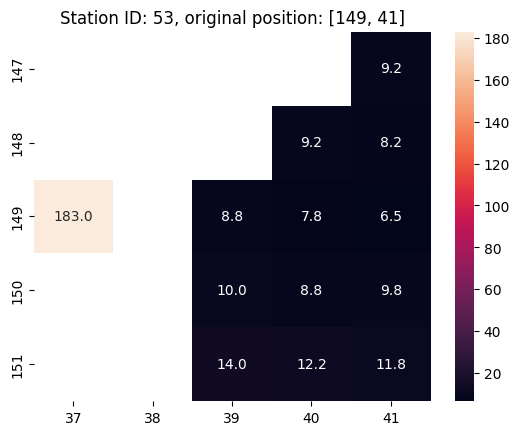

Neighbors:
Station ID: 58, Distance: 55.59 at Angle 89.0


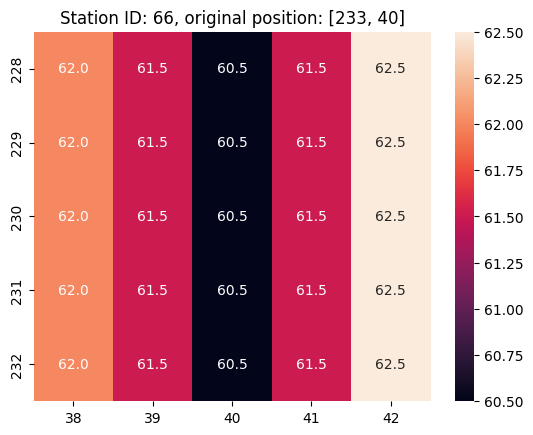

Neighbors:
Station ID: 52, Distance: 77.47 at Angle 241.0


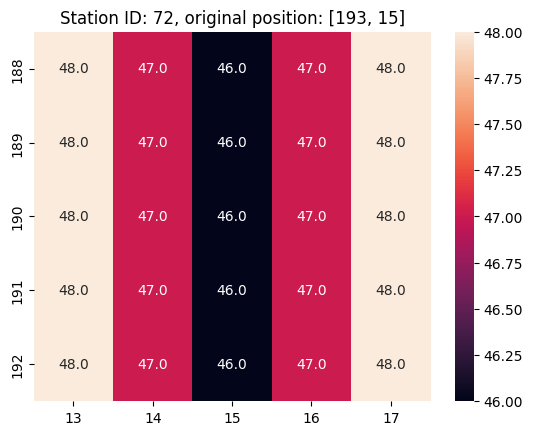

Neighbors:
Station ID: 22, Distance: 3.59 at Angle 63.0
Station ID: 53, Distance: 9.76 at Angle 31.0
Station ID: 35, Distance: 47.54 at Angle 137.0
Station ID: 34, Distance: 46.96 at Angle 130.0


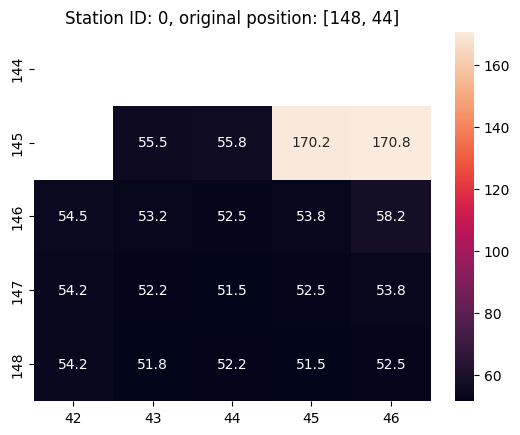

Neighbors:
Station ID: 12, Distance: 42.34 at Angle 84.0
Station ID: 22, Distance: 21.76 at Angle 80.0
Station ID: 3, Distance: 28.44 at Angle 45.0


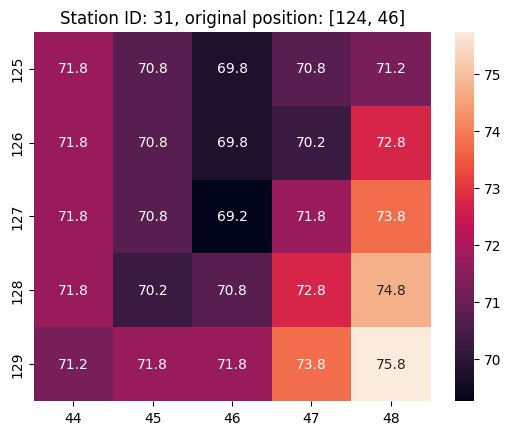

Neighbors:
Station ID: 83, Distance: 23.51 at Angle 67.0
Station ID: 3, Distance: 21.17 at Angle 174.0
Station ID: 85, Distance: 21.51 at Angle 27.0


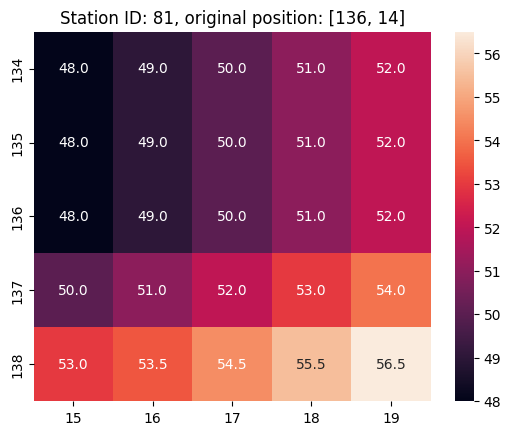

Neighbors:
Station ID: 35, Distance: 54.79 at Angle 26.0


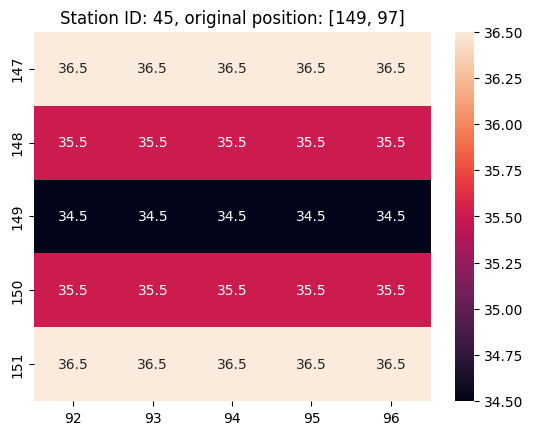

Neighbors:
Station ID: 3, Distance: 15.76 at Angle 75.0
Station ID: 53, Distance: 1.00 at Angle 180.0
Station ID: 22, Distance: 12.93 at Angle 225.0
Station ID: 72, Distance: 77.47 at Angle 61.0
Station ID: 58, Distance: 28.59 at Angle 92.0


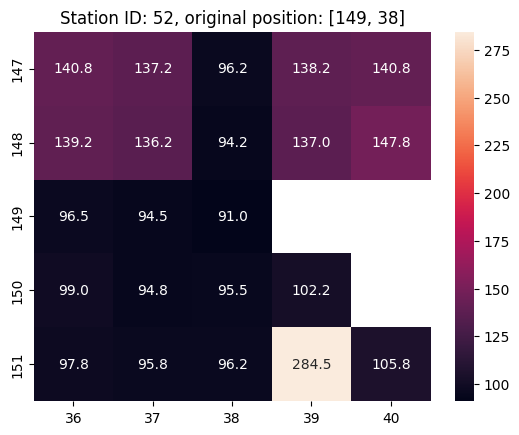

Neighbors:
Station ID: 11, Distance: 63.86 at Angle 78.0


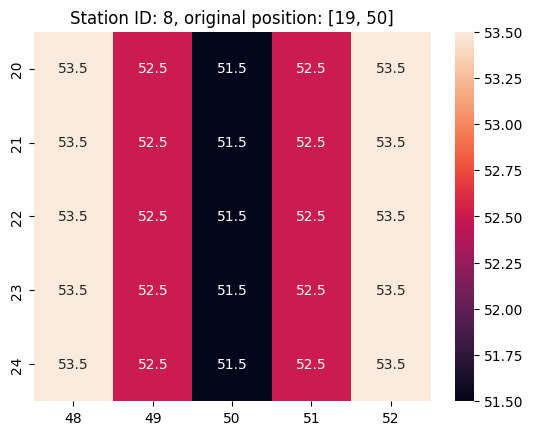

Neighbors:
Station ID: 12, Distance: 24.17 at Angle 95.0
Station ID: 96, Distance: 162.56 at Angle 221.0
Station ID: 8, Distance: 63.86 at Angle 258.0


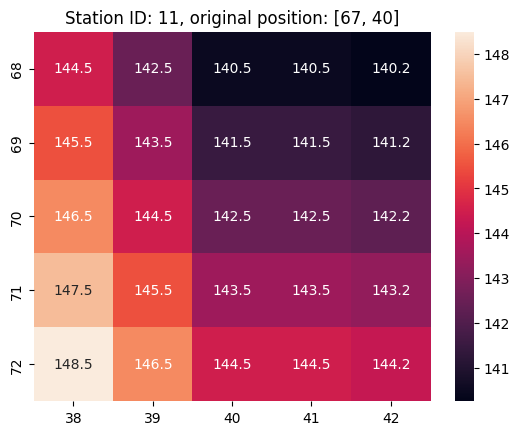

Neighbors:
Station ID: 22, Distance: 153.39 at Angle 42.0


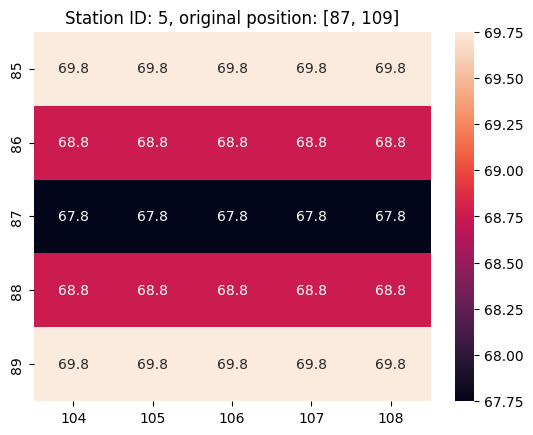

Neighbors:
Station ID: 65, Distance: 61.20 at Angle 110.0
Station ID: 66, Distance: 55.59 at Angle 91.0
Station ID: 52, Distance: 28.59 at Angle 88.0


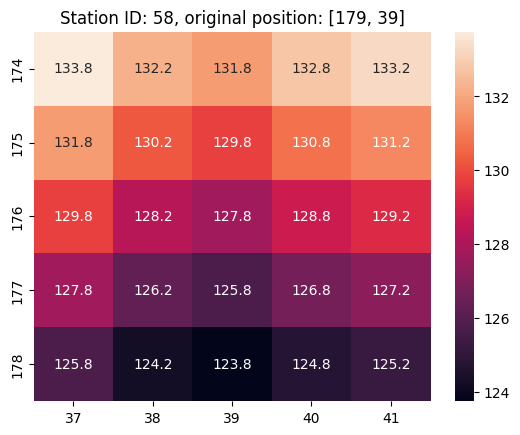

Neighbors:
Station ID: 81, Distance: 21.51 at Angle 153.0


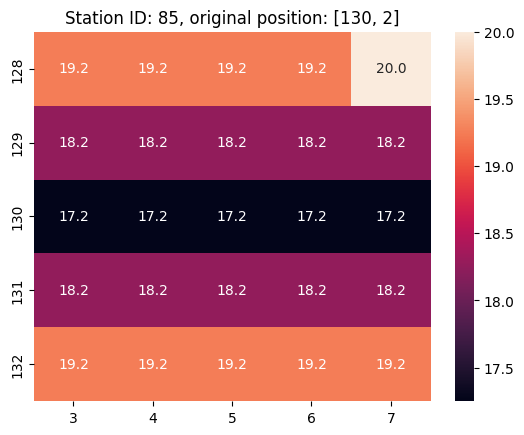

In [6]:
washington_heatmaps = generate_heatmaps(washington_data)

In [10]:
from functools import reduce

def heatmap_summary(heatmaps):
    total_heatmap = reduce(
        lambda a, b: a.add(b, fill_value=b.mean(axis=None)),
        [heatmap.set_axis([1, 2, 3, 4, 5], axis=0).set_axis([1, 2, 3, 4, 5], axis=1) for heatmap in heatmaps]
    )
    total_heatmap = total_heatmap.div(len(heatmaps))

    ax = sns.heatmap(total_heatmap, annot=True, fmt=".1f")
    plt.title('Sum and average of all heatmaps')
    plt.show()

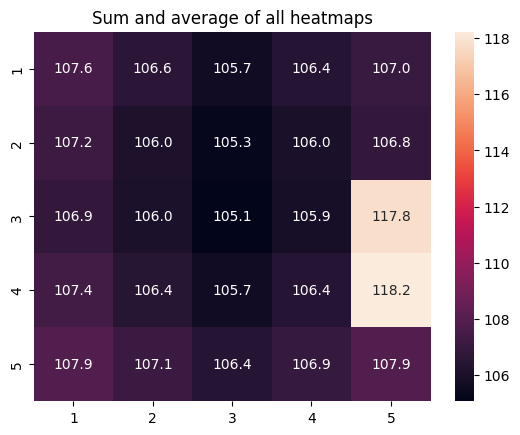

In [11]:
heatmap_summary(montreal_heatmaps)

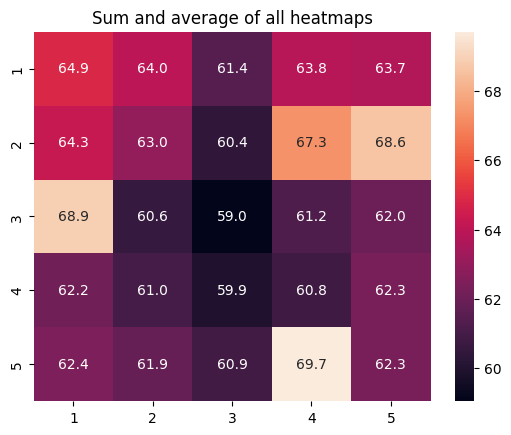

In [12]:
heatmap_summary(washington_heatmaps)